In [ ]:
1.Introduction This assignment will help you to consolidate the concepts learnt in the session. 
2.Problem Statement 
Predicting Survival in the Titanic Data Set 
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. 
Loading Data and modules 
 
 
 
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti cket','Fare','Cabin','E mbarked'] 
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived. 
NOTE:ThesolutionsharedthroughGithubshouldcontainthesource codeusedand thescreenshotoftheoutput. 
3. Output 
This assignment consists of 200 marks and has to be submitted in .ipynb/PDF format in the upcoming session for evaluation.

In [126]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn
from pandas import Series, DataFrame 
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
import graphviz

In [127]:
import requests
import io
import urllib3

In [128]:
url="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
titanic_train = pd.read_csv(url)
#url = https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv
url_test="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"
titanic_test=pd.read_csv(url_test)

In [129]:
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [130]:
##Dropping the unnecessary columns as mentioned on both train and test data
selected_train=titanic_train.drop(labels=['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
selected_test=titanic_test.drop(labels=['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

In [131]:
y=selected_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [132]:
selected_train.drop(labels=['Survived'],axis=1,inplace=True)

In [133]:
##Checking Nan Values in dataset
print(selected_train.isnull().sum())
print("Age has 177 null values so we need to impute")

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64
Age has 177 null values so we need to impute


In [134]:
selected_train.describe()

Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [135]:
selected_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [136]:
import pandas_profiling

In [232]:
selected_train.profile_report()

# Fare Imputation with replacing categorically the values of fare

In [27]:
fare_impute=selected_train.groupby(selected_train['Pclass'])

In [42]:
selected_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [141]:
fare_median_3=fare_impute.get_group(3).median()[4]
fare_median_2=fare_impute.get_group(2).median()[4]
fare_median_1=fare_impute.get_group(1).median()[4]
print('{},{},{}'.format(fare_median_1,fare_median_2,fare_median_3))

61.9792,15.0229,8.05


In [ ]:
selected_train.loc[((selected_train['Fare'] == 0) & (selected_train['Pclass'] == 1)),['Fare']] = fare_median_1
selected_train.loc[((selected_train['Fare'] == 0) & (selected_train['Pclass'] == 2)),['Fare']] = fare_median_2
selected_train.loc[((selected_train['Fare'] == 0) & (selected_train['Pclass'] == 3)),['Fare']] = fare_median_3

In [ ]:
selected_train[selected_train['Fare'] == 0]

# Age Imputation

In [230]:
selected_train['Age'].fillna(value=selected_train['Age'].mean(),inplace=True)

In [231]:
selected_train['Age'].isna().sum()

0

In [240]:
y.value_counts()
print('People survived are {} and who was not able to survive are {}'.format(y.value_counts()[0],y.value_counts()[1]))
print("Checkind whether data set is imbalance or balance")
print("Survived in term of percentage is : {} Percent ".format(y.value_counts()[1]/(y.value_counts()[1]+y.value_counts()[0])*100))
print("Not Survived in term of percentage is : {} Percent ".format(y.value_counts()[0]/(y.value_counts()[1]+y.value_counts()[0])*100))
print("We can go ahead with this dataset as it seems 60-40%")

People survived are 549 and who was not able to survive are 342
Checkind whether data set is imbalance or balance
Survived in term of percentage is : 38.38383838383838 Percent 
Not Survived in term of percentage is : 61.61616161616161 Percent 


In [14]:
#Verifing null value once
selected_train.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

# Handling Categorical Features

In [249]:
##Now we will encode categorical data
selected_train.nunique()

Pclass      3
Sex         2
Age        88
SibSp       7
Parch       7
Fare      248
dtype: int64

In [246]:
selected_train['Sex']=selected_train['Sex'].map({'female':0, 'male':1})

In [252]:
selected_train.head()

Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  22.0      1      0   7.2500
1       1    0  38.0      1      0  71.2833
2       3    0  26.0      0      0   7.9250
3       1    0  35.0      1      0  53.1000
4       3    1  35.0      0      0   8.0500

In [253]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [254]:
selected_train.iplot(kind='box')

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [256]:
x_train,x_test,y_train,y_test=train_test_split(selected_train,y,test_size=0.3,random_state=101)

In [258]:
print(x_train.shape)
print(y_train.shape)

(623, 6)
(623,)


In [259]:
dtree_model=DecisionTreeClassifier()

In [260]:
##Model 1 Implementing model with default hyper-parameters
dt1=dtree_model.fit(x_train,y_train)
y_pred=dt1.predict(x_test)

In [261]:
print("Our confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("Accuracy is ",accuracy_score(y_test,y_pred))
print("Area under AUC-ROC Curve is ",roc_auc_score(y_test,y_pred))

Our confusion Matrix:
[[134  20]
 [ 37  77]]
Accuracy is  0.7873134328358209
Area under AUC-ROC Curve is  0.7727842333105491


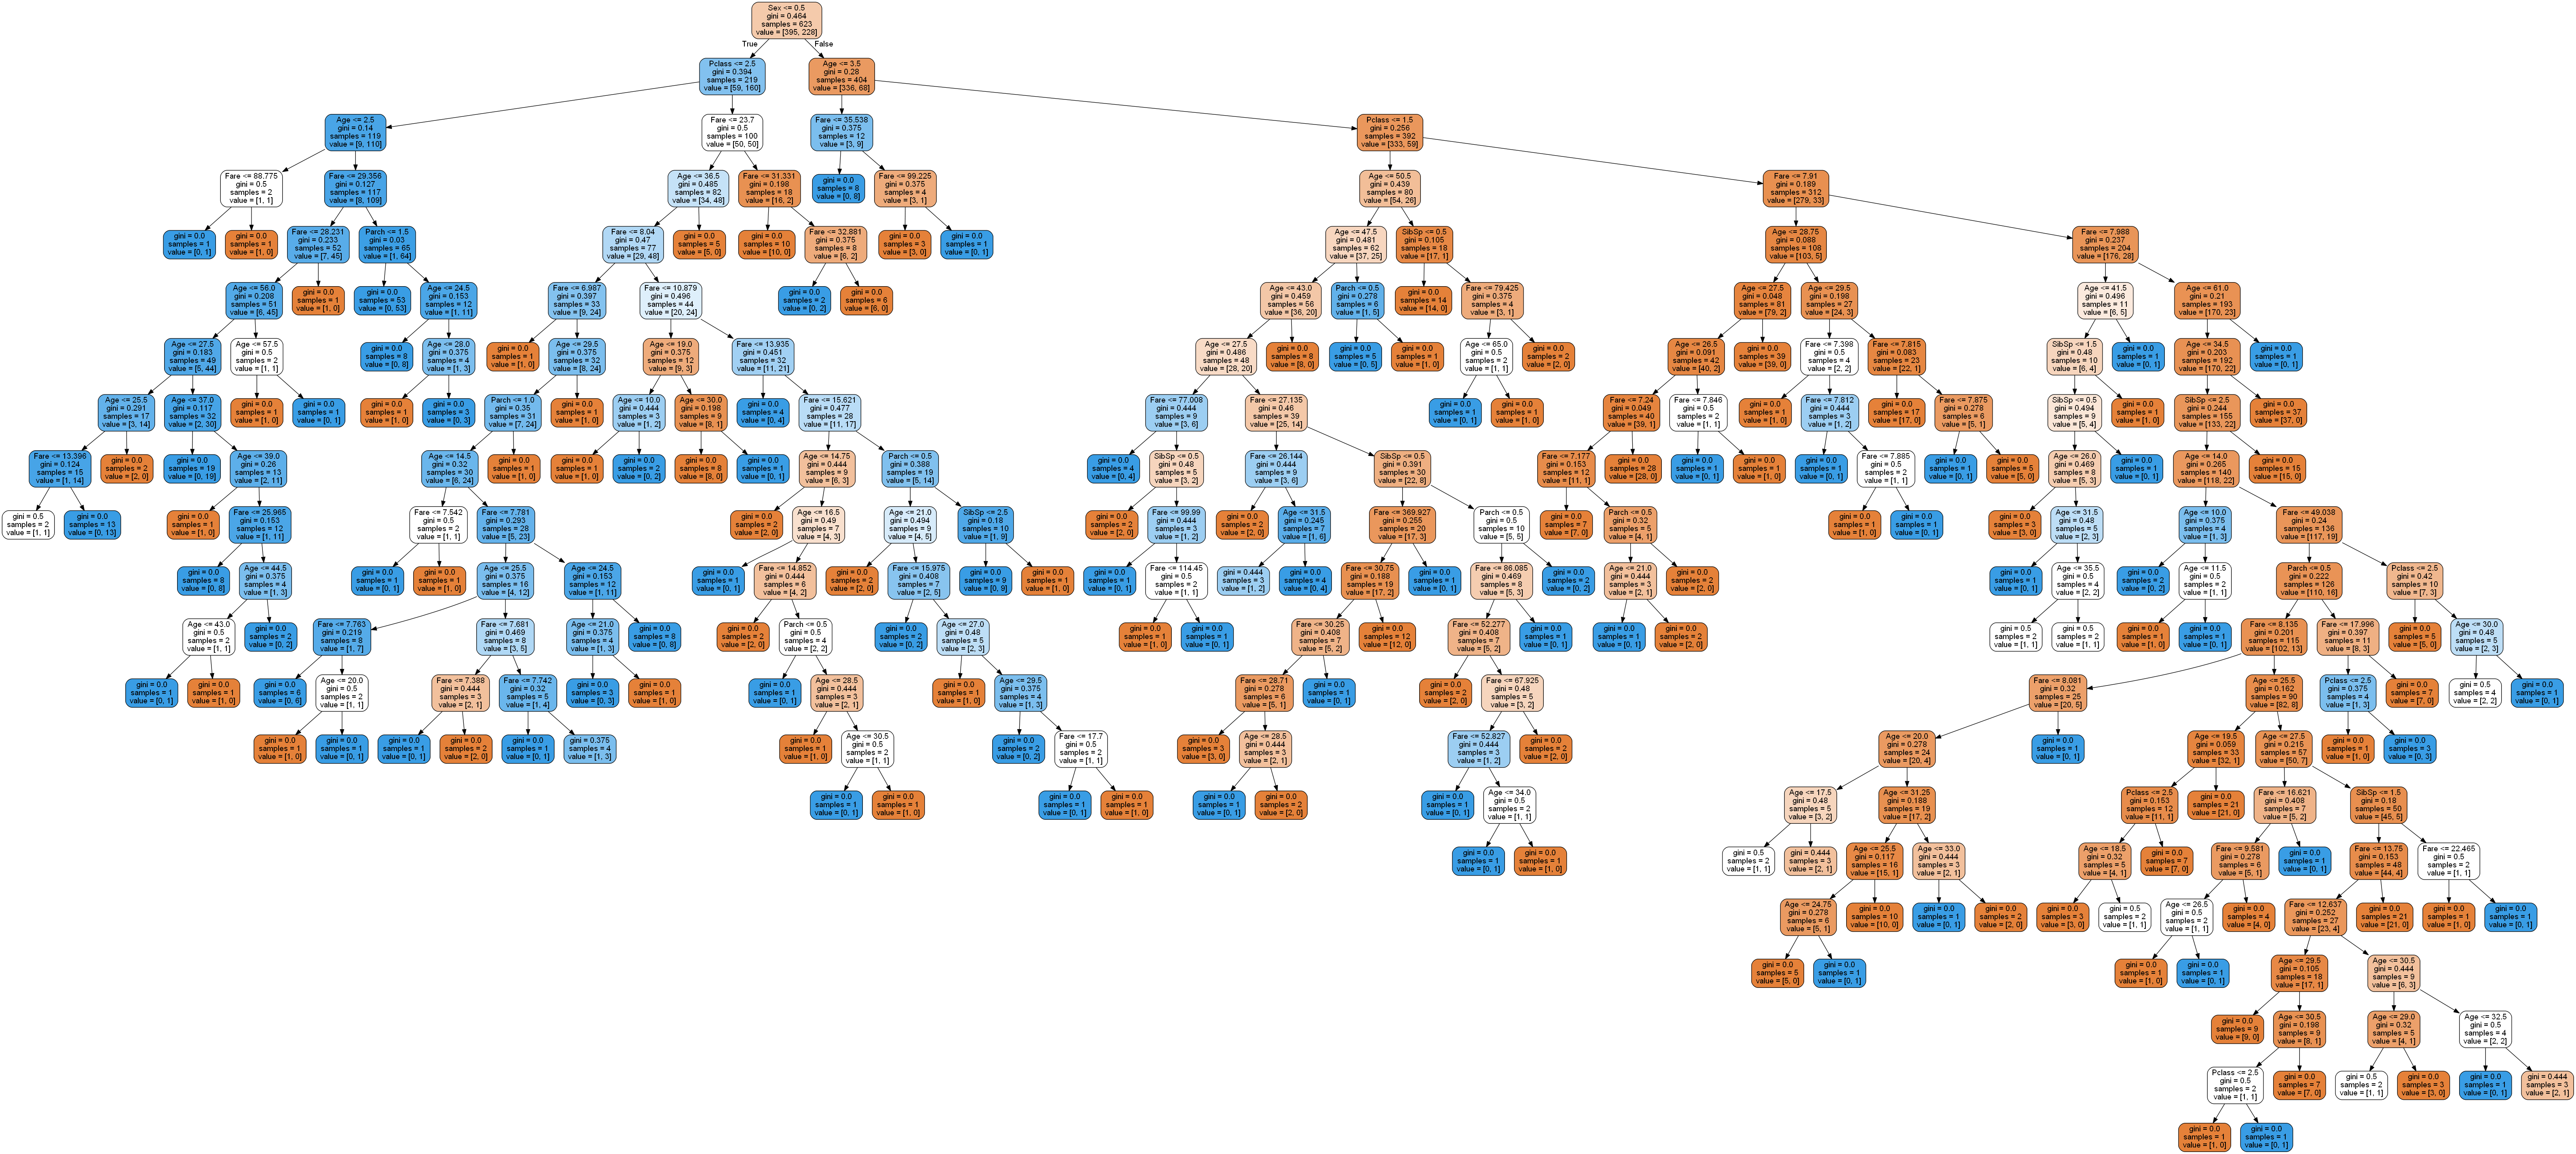

In [262]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/HP/Anaconda3/Library/bin/graphviz'

feature_name=list(selected_train.columns)
dot_data = export_graphviz(dt1,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [ ]:
## Model 2 -- Standardization of data

In [263]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

##x_transform = scalar.fit_transform(selected_train)

In [265]:
xt_train=scalar.fit_transform(x_train)

In [266]:
xt_test=scalar.fit_transform(x_test)

In [267]:
dt2=dtree_model.fit(x_train,y_train)
y_pred2=dt1.predict(x_test)

In [268]:
print("Our confusion Matrix:")
print(confusion_matrix(y_test,y_pred2))

print("Accuracy is ",accuracy_score(y_test,y_pred2))
print("Area under AUC-ROC Curve is ",roc_auc_score(y_test,y_pred2))

Our confusion Matrix:
[[135  19]
 [ 35  79]]
Accuracy is  0.7985074626865671
Area under AUC-ROC Curve is  0.7848029163818638


In [ ]:
#Model 3 - Using Grid Search to get best parameter

In [269]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,40,1),
    'min_samples_leaf' : range(1,40,1),
    'min_samples_split': range(1,40,1),
    'splitter' : ['best', 'random']
}

In [272]:
dt3=DecisionTreeClassifier()

In [273]:
grid_search = GridSearchCV(estimator=dt3,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [274]:
grid_search.fit(xt_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 40),
                         'min_samples_split': range(1, 40),
                         'splitter': ['best', 'random']})

In [275]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 30, 'splitter': 'random'}


In [277]:
best_parameters

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 30,
 'splitter': 'random'}

In [278]:
dt3 = DecisionTreeClassifier(criterion = 'gini', max_depth =6, min_samples_leaf= 1, min_samples_split=30, splitter ='best')
dt3.fit(xt_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=30)

In [279]:
y_pred3=dt3.predict(xt_test)

In [280]:
print("Our confusion Matrix:")
print(confusion_matrix(y_test,y_pred3))

print("Accuracy is ",accuracy_score(y_test,y_pred3))
print("Area under AUC-ROC Curve is ",roc_auc_score(y_test,y_pred3))

Our confusion Matrix:
[[132  22]
 [ 39  75]]
Accuracy is  0.7723880597014925
Area under AUC-ROC Curve is  0.7575187969924813


In [281]:
print('We are not able to achieve accuracy greater than this as it contains only 891 records')

We are not able to achieve accuracy greater than this as it contains only 891 records


In [ ]:
##Ignore this for user reference 
#missing = np.where(selected_train["Age"].isnull() == True)
#missing